# The Below cell is for all the imports

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import pickle as pk
import os
import random
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping,ModelCheckpoint
import datetime

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

TF version: 2.12.0
Hub version: 0.15.0


# Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# loading data from from the Drive

## variable assignments

In [ ]:
basic_add="/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed"
df=[]
RANDOM_STATE=101
dataSet_Size=18037 #@param{type:"slider",min:100,max:23205}
list_variaty=["MildDemented","ModerateDemented","NonDemented","VeryMildDemented","glioma","meningioma","notumor","pituitary"]
limit_train=int(0.8*dataSet_Size)
limit_val=int(0.90*dataSet_Size)
IMG_SIZE=224
tensor_seed=((7,3))
BATCH_SIZE=32
NUM_EPOCHS = 20 #@param {type:"slider", min:10, max:50, step:10}
dict_label = {
        "MildDemented": 0,
        "ModerateDemented": 1,
        "NonDemented": 2,
        "VeryMildDemented": 3,
        "glioma": 4,
        "meningioma": 5,
        "notumor": 6,
        "pituitary": 7
    }

dict_label_reverse = {
        0:"MildDemented",
        1:"ModerateDemented",
        2:"NonDemented",
        3:"VeryMildDemented",
        4:"glioma",
        5:"meningioma",
        6:"notumor",
        7:"pituitary"
    }

In [ ]:
def genAddress(basic_add,list_variaty):
  data=[]
  for add in list_variaty:
    new_add=basic_add+"/"+add+"/"
    l=os.listdir(new_add)
    for j in l:
      data.append((new_add+j,add))
  return data

In [ ]:
df=genAddress(basic_add,list_variaty)

In [ ]:
len(df)

23167

In [ ]:
df[1:10]

[('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/MildDemented/61cbee1a-4464-4422-abdd-76173ab521e0.png',
  'MildDemented'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/MildDemented/61c69b0c-a3a6-478c-817d-5f390541a59b.png',
  'MildDemented'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/MildDemented/61c92f72-0ba4-4465-acd1-e37e040ba984.png',
  'MildDemented'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/MildDemented/61546587-e5aa-4966-99ef-6fb8f127d500.png',
  'MildDemented'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/MildDemented/616eee26-2d00-4930-a890-8d37b7cb0279.png',
  'MildDemented'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/MildDemented/6179b374-863c-4bd4-aaed-77b6cf4f000b.png',
  'MildDemented'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/w

## Shuffling to mix the data uniformly

In [ ]:
random.shuffle(df)

df=df[1:dataSet_Size]
df[1:5]

[('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/VeryMildDemented/aabaee20-5c1a-4c40-965f-34dbb933f4a0.png',
  'VeryMildDemented'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/glioma/64f8d38d-f608-4f96-946f-601b05400fe4.png',
  'glioma'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/MildDemented/94f2a1b2-8f59-48ed-9122-71676e9764ee.png',
  'MildDemented'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/NonDemented/aea37b9b-1518-43e4-a2b9-c5a5ccb78830.png',
  'NonDemented')]

In [ ]:
model_url = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
IMAGE="/MildDemented/60056e89-abca-4b7c-a208-df8367a8cd65.png"
from IPython.display import display, Image
# Load the pre-trained model
from PIL import Image
import numpy as np

# Step 1: Load a pre-trained super-resolution model from TensorFlow Hub
model_url = "https://tfhub.dev/captain-pool/esrgan-tf2/1"  # ESRGAN model for super-resolution
model = hub.load(model_url)


# Step 2: Load and preprocess your low-resolution image
image_path = "/content/drive/MyDrive/kaggle/working/processed/glioma/d2613856-1ef7-494d-8e22-f14a1d038f09.png"  # Replace with the path to your low-resolution image
input_image = Image.open(image_path)
input_image = input_image.convert("RGB")  # Ensure RGB mode
input_image = input_image.resize((256, 256), Image.ANTIALIAS)  # Resize to the model's expected input size
input_image = np.array(input_image) / 255.0  # Normalize pixel values

# Cast the input image to tf.float32
input_image = tf.cast(input_image, tf.float32)

# Step 3: Perform super-resolution on the input image
super_res_image = model(tf.constant(input_image[np.newaxis, ...]))

# Step 4: Post-process the enhanced image if necessary (e.g., denoising, sharpening)

# Step 5: Save or display the enhanced image
output_image = tf.squeeze(super_res_image).numpy()  # Remove batch dimension
output_image = (output_image * 255).clip(0, 255).astype(np.uint8)  # Convert back to uint8
output_image = Image.fromarray(output_image)
output_image.save("output_image.jpg")  # Save the enhanced image

# Step 6: Display the enhanced image (optional)
output_image.show()

FileNotFoundError: ignored

In [ ]:
output_image

# Converting the labels

In [ ]:
def converting_labels_to_tensor(data):
  """
    receive a list of stirng and converts into number according to the dictionary
  """
  dict_label = {
        "MildDemented": 0,
        "ModerateDemented": 1,
        "NonDemented": 2,
        "VeryMildDemented": 3,
        "glioma": 4,
        "meningioma": 5,
        "notumor": 6,
        "pituitary": 7
    }
  label=[]
  for i in data:
    label.append(dict_label[i])
  return label

In [ ]:
converting_labels_to_tensor(["VeryMildDemented"])

[3]

In [ ]:
def augment_labels(labels):
    augmented_labels = []
    for label in labels:
        augmented_labels.extend([label] * 5)  # Replicate each label four times
    return augmented_labels

# Split the data for now
### only the training & validating part will be converted to image now
##!!! Do not forget to Convert the testing data addresses to images before using it !!!

In [ ]:
train_data=df[0:limit_train]
val_data=df[limit_train:limit_val]
test_data=df[limit_val:dataSet_Size]

(len(train_data),len(val_data),len(test_data))

(14429, 1804, 1803)

In [ ]:
test_data[1:12]

[('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/glioma/030d417a-8745-4a5e-bebb-432b62207362.png',
  'glioma'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/notumor/75c435bb-9d48-4051-a174-a5b0b940532b.png',
  'notumor'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/VeryMildDemented/402f55eb-b432-4772-b01e-fbef9f4130dd.png',
  'VeryMildDemented'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/glioma/b155cc79-0a06-4bf7-86f9-a6ad1b38e4af.png',
  'glioma'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/NonDemented/17313bec-e58a-4c75-bfec-107435df2d84.png',
  'NonDemented'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/glioma/15b2512b-d705-4677-a0c5-35d22dd4ddd1.png',
  'glioma'),
 ('/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/glioma/438c13d7-6386-47

# Plotting to be done Here
# !!! Moderate Demented have less data be carefull

In [ ]:
def countAddress(basic_add,list_variaty):
  data=[]
  for add in list_variaty:
    new_add=basic_add+"/"+add+"/"
    l=len(os.listdir(new_add))
    data.append((add,l))
  return data

In [ ]:
    new_add="/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/MildDemented"
    l=len(os.listdir(new_add))
    print(l)

1613


In [ ]:
plot_data=countAddress(basic_add,list_variaty)
plot_data

[('MildDemented', 1613),
 ('ModerateDemented', 116),
 ('NonDemented', 5760),
 ('VeryMildDemented', 4032),
 ('glioma', 3573),
 ('meningioma', 2869),
 ('notumor', 1990),
 ('pituitary', 3214)]

In [ ]:
labels, values = zip(*plot_data)

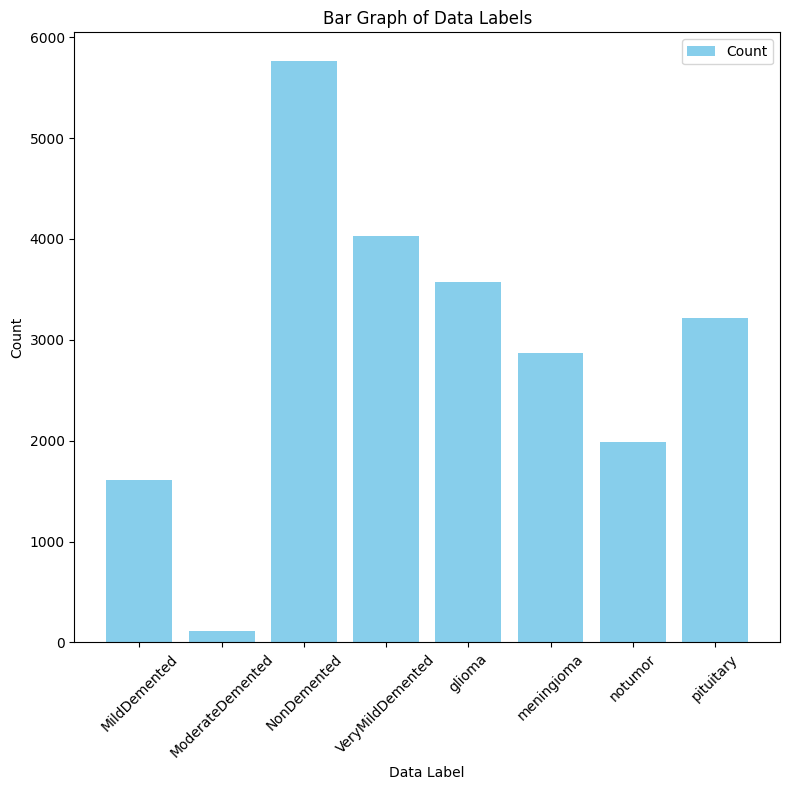

In [ ]:
plt.figure(figsize=(8, 8))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Data Label')
plt.ylabel('Count')
plt.title('Bar Graph of Data Labels')
plt.xticks(rotation=45)

plt.legend(['Count'])

plt.tight_layout()
plt.show()

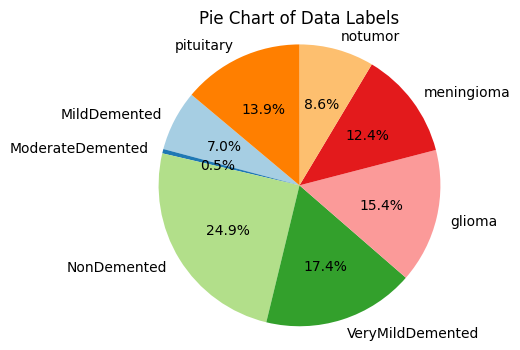

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(labels))))
plt.title('Pie Chart of Data Labels')
plt.axis('equal')
plt.show()

In [ ]:
# import os
# import cv2
# import numpy as np

# # Set the paths for your source and destination folders
# source_folder = "/content/drive/MyDrive/Major_Project/kaggle/working/processed/notumor"
# destination_folder = "/content/drive/MyDrive/Major_Project/kaggle/working/processed/notumor_aug"

# # Create the destination folder if it doesn't exist
# if not os.path.exists(destination_folder):
#     print("Here")
#     os.makedirs(destination_folder)

# # List all image files in the source folder
# image_files = [f for f in os.listdir(source_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# # Loop through each image, load, apply rotation operations, and save to the destination folder
# for image_file in image_files:
#     image_path = os.path.join(source_folder, image_file)
#     image = cv2.imread(image_path)

#     # Save the original image to the destination folder
#     destination_path_original = os.path.join(destination_folder, image_file)
#     cv2.imwrite(destination_path_original, image)

#     # Apply rotation operations (90 degrees left, 90 degrees right, and 180 degrees)
#     rotated_left = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
#     rotated_right = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
#     rotated_180 = cv2.rotate(image, cv2.ROTATE_180)

#     # Save the rotated images to the destination folder
#     base_filename, file_extension = os.path.splitext(image_file)
#     destination_path_left = os.path.join(destination_folder, f"{base_filename}_rotate_left{file_extension}")
#     destination_path_right = os.path.join(destination_folder, f"{base_filename}_rotate_right{file_extension}")
#     destination_path_180 = os.path.join(destination_folder, f"{base_filename}_rotate_180{file_extension}")

#     cv2.imwrite(destination_path_left, rotated_left)
#     cv2.imwrite(destination_path_right, rotated_right)
#     cv2.imwrite(destination_path_180, rotated_180)

# print("Rotation operations and original image saving completed.")


# Preprocessing

In [ ]:
def preprocess(image_path,label):
  """
  within this function we implement five functionalities :
  1. image reading
  2. image resizing
  3. image normalizing
  //4.image augmentation
  5.image cleaning
  """
  image = image_reading(image_path)
  image = image_resizing(image)
  image = image_normalizing(image)
  # label = converting_labels_to_tensor(label) # did prior
  label = tf.convert_to_tensor(label)
  return image, label


def preprocess_test(image_path):
  """
  within this function we implement five functionalities :
  1. image reading
  2. image resizing
  3. image normalizing
  4.image augmentation
  5.image cleaning
  """
  image = image_reading(image_path)
  image = image_resizing(image)
  image = image_normalizing(image)
  return image

## We are reading the string address then converting into tensors images

## we have used 3 color channels

## Grey Channel color coding is used as MRI only need black,white and grey, it makes matrix size small so less load on the training phase

In [ ]:
def image_reading(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Set channels to 1 for grayscale
    return image

## Resizing the Images to a Set size so all the images have uniformity

In [ ]:
def image_resizing(image):
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    image.set_shape([IMG_SIZE, IMG_SIZE, 3])  # Set channels to 1
    return image

## The Range of numbers varies a lot it might cause some issues leading to overfitting to counter this we implemented normalization in order to bring the range between 0-1

In [ ]:
def image_normalizing(image):
    image = tf.image.convert_image_dtype(image, tf.float32)
    image.set_shape([IMG_SIZE, IMG_SIZE, 3])  # Set channels to 1
    return image

## Augumenting the images to get more data and variety on the same data

In [ ]:
def image_augmentation(image):
    # Random horizontal flip (only if it makes sense for your data)
    image1 = tf.image.random_flip_left_right(image, seed=tf.random.set_seed(1234))  # Use a specific seed

    # Random rotation (only if it makes sense for your data)
    image2 = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32), name='random_rotation')

    # Random brightness and contrast adjustments
    image3 = tf.image.random_brightness(image, max_delta=0.2, seed=tf.random.set_seed(5678))  # Use a specific seed
    image4 = tf.image.random_contrast(image, lower=0.8, upper=1.2, seed=tf.random.set_seed(9876))  # Use a specific seed

    return [image,image1,image2,image3,image4]

In [ ]:
len(train_data)

14429

# getting data ready for batching

In [ ]:
def separate(data):
  x=[]
  y=[]
  for i in data:
    x.append(i[0])
    # indexl=i[1].index("_")
    y.append(i[1])
  return x,y


In [ ]:
x_train,y_train=separate(train_data)
x_val,y_val=separate(val_data)
x_test,y_test=separate(test_data)

In [ ]:
x_test

['/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/meningioma/98096431-28c3-44cc-acc3-193b514e954f.png',
 '/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/glioma/030d417a-8745-4a5e-bebb-432b62207362.png',
 '/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/notumor/75c435bb-9d48-4051-a174-a5b0b940532b.png',
 '/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/VeryMildDemented/402f55eb-b432-4772-b01e-fbef9f4130dd.png',
 '/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/glioma/b155cc79-0a06-4bf7-86f9-a6ad1b38e4af.png',
 '/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/NonDemented/17313bec-e58a-4c75-bfec-107435df2d84.png',
 '/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/processed/glioma/15b2512b-d705-4677-a0c5-35d22dd4ddd1.png',
 '/content/drive/MyDrive/image_224x224_no_augmentation/kaggle/working/

In [ ]:
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
        data = data.map(preprocess_test)
        data = data.batch(batch_size)
        return data

    elif valid_data:
        print("Creating validation data batches...")
        y=converting_labels_to_tensor(y)
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
        data = data.shuffle(buffer_size=len(x))
        data = data.map(preprocess)
        data = data.batch(batch_size)
        return data

    else:
        print("Creating training data batches...")
        y=converting_labels_to_tensor(y)
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
        data = data.shuffle(buffer_size=len(x))
        data = data.map(preprocess)
        data = data.batch(batch_size)
        return data


In [ ]:
train_data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val,valid_data=True)
test_data=create_data_batches(x_test,test_data=True)

Creating training data batches...
Creating validation data batches...
Creating test data batches...


In [ ]:
def string_to_number(data):
  num=[]
  for i in data:
    num.append(dict_label[i])
  return num

In [ ]:
y_test=string_to_number(y_test)

In [ ]:
y_test

[5,
 4,
 6,
 3,
 4,
 2,
 4,
 4,
 0,
 0,
 2,
 3,
 6,
 3,
 6,
 2,
 6,
 0,
 2,
 2,
 0,
 3,
 2,
 2,
 5,
 7,
 5,
 2,
 6,
 3,
 3,
 3,
 4,
 4,
 2,
 2,
 2,
 2,
 4,
 5,
 3,
 4,
 4,
 0,
 6,
 0,
 0,
 2,
 3,
 3,
 7,
 0,
 4,
 0,
 2,
 3,
 2,
 3,
 7,
 2,
 2,
 6,
 0,
 4,
 2,
 4,
 4,
 4,
 5,
 7,
 6,
 5,
 7,
 5,
 3,
 0,
 4,
 5,
 5,
 3,
 2,
 2,
 5,
 3,
 7,
 2,
 6,
 3,
 3,
 5,
 7,
 0,
 5,
 0,
 7,
 5,
 2,
 7,
 4,
 7,
 5,
 4,
 4,
 0,
 5,
 3,
 7,
 1,
 6,
 2,
 4,
 2,
 6,
 7,
 7,
 7,
 4,
 5,
 2,
 7,
 2,
 7,
 6,
 4,
 4,
 3,
 4,
 4,
 7,
 2,
 1,
 6,
 2,
 2,
 3,
 5,
 5,
 2,
 2,
 3,
 4,
 7,
 3,
 5,
 4,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 4,
 4,
 5,
 2,
 6,
 5,
 0,
 3,
 4,
 6,
 7,
 5,
 5,
 4,
 7,
 2,
 2,
 4,
 3,
 5,
 2,
 0,
 2,
 5,
 6,
 7,
 3,
 0,
 2,
 7,
 3,
 2,
 2,
 4,
 3,
 4,
 2,
 5,
 3,
 2,
 4,
 5,
 7,
 5,
 3,
 2,
 7,
 5,
 5,
 7,
 0,
 2,
 3,
 0,
 5,
 5,
 6,
 2,
 5,
 4,
 3,
 2,
 5,
 7,
 2,
 6,
 5,
 7,
 5,
 7,
 4,
 4,
 2,
 4,
 7,
 6,
 6,
 4,
 3,
 7,
 2,
 4,
 2,
 5,
 0,
 3,
 5,
 4,
 0,
 7,
 7,
 4,
 4,
 2,
 2,
 3,


In [ ]:
train_data



<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

Model urls

In [ ]:
#Resnet
"""tf.keras.applications.resnet.ResNet152(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    **kwargs
) """

#inception
"""tf.keras.applications.inception_v3.InceptionV3(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)"""

#Xception
"""tf.keras.applications.xception.Xception(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)"""

#Nasnet

"""tf.keras.applications.nasnet.NASNetLarge(
    input_shape=None,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)"""
#Mobilenet
"""tf.keras.applications.MobileNetV3Large(
    input_shape=None,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation='softmax',
    include_preprocessing=True
)"""

#Efficientnet
"""tf.keras.applications.MobileNetV3Large(
    input_shape=None,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation='softmax',
    include_preprocessing=True
)"""

#densenet
"""tf.keras.applications.densenet.DenseNet201(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)"""

"tf.keras.applications.densenet.DenseNet201(\n    include_top=True,\n    weights='imagenet',\n    input_tensor=None,\n    input_shape=None,\n    pooling=None,\n    classes=1000,\n    classifier_activation='softmax'\n)"

# Getting the stuff Ready for model building

In [ ]:
def save_model(model, suffix=None):
    """
    Saves a given model in a models directory and appends a suffix (str)
    for clarity and reuse.
    """
    # Create model directory with current time
    modeldir = os.path.join("drive/My Drive/Data/models",
                            datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))

    # Create the directory if it doesn't exist
    os.makedirs(modeldir, exist_ok=True)

    model_path = os.path.join(modeldir, f"model-{suffix}")  # save format of model
    print(f"Saving model to: {model_path}...")

    # Use model.save instead of tf.saved_model.save
    model.save(model_path, save_format="tf")

    return model_path


In [ ]:
def load_model(model_path):
    """
    Loads a saved model from a specified path.
    """
    print(f"Loading saved model from: {model_path}")

    # Use tf.keras.models.load_model to load the model
    model = tf.keras.models.load_model(model_path)

    return model


In [ ]:
# Setup input shape to the model

INPUT_SHAPE = [IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = 8 # number of unique labels # Work it here

MODEL_URL="https://tfhub.dev/google/tf2-preview/inception_v3/classification/4"

MODEL_URLS = [
    "https://tfhub.dev/google/tf2-preview/inception_v3/classification/4",
    "https://tfhub.dev/google/imagenet/resnet_v2_152/classification/5",
    "https://tfhub.dev/google/imagenet/nasnet_large/classification/5"
]

In [ ]:
#inceptionnetv3="https://tfhub.dev/google/tf2-preview/inception_v3/classification/4"

#mobilenetv3="https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5"

#resnetv2="https://tfhub.dev/google/imagenet/resnet_v2_152/classification/5"

#Nasnet="https://tfhub.dev/google/imagenet/nasnet_large/classification/5"



In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with:", model_url)

    # Create a sequential model
    model = tf.keras.Sequential()

    # Add the pre-trained model as the first layer with the specified input shape
    model.add(hub.KerasLayer(model_url, input_shape=input_shape, trainable=True))  # Use hub.KerasLayer directly

    # Add a dense output layer with softmax activation
    model.add(tf.keras.layers.Dense(output_shape, activation="softmax"))

    # Use SparseCategoricalCrossentropy loss function
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

    return model

In [ ]:
#single model
model = create_model(INPUT_SHAPE,OUTPUT_SHAPE,"https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5")
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5508713   
                                                                 
 dense (Dense)               (None, 8)                 8016      
                                                                 
Total params: 5,516,729
Trainable params: 5,492,329
Non-trainable params: 24,400
_________________________________________________________________


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

def create_tensorboard_callback1():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs/inceptionnet/",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import tensorflow_hub as hub
import os

# Register the custom layer for loading
def hub_keras_layer_fn(handle, trainable=False, **kwargs):
    return hub.KerasLayer(handle, trainable=trainable, **kwargs)

# Register the custom layer for serialization
def hub_keras_layer_get_config(layer):
    return {"handle": layer._handle, "trainable": layer.trainable}

# Register the custom layer with Keras
def custom_objects():
    return {"hub": hub, "KerasLayer": hub_keras_layer_fn}

def train_model(model_url=MODEL_URL):
    """
    Trains a given model and returns the trained version.
    """
    checkpoint_path = "drive/My Drive/Data/checkpoints/model_checkpoint.h5"

    # Check if the model checkpoint exists
    if os.path.exists(checkpoint_path):
        # Load the existing model with custom objects
        with tf.keras.utils.custom_object_scope(custom_objects()):
            model = load_model(checkpoint_path)
        print("Loaded existing model from", checkpoint_path)
    else:
        # Create a new model
        model = create_model(INPUT_SHAPE, OUTPUT_SHAPE, str(model_url))
        print("Created a new model")

    # Create new TensorBoard session every time we train a model
    tensorboard = create_tensorboard_callback1()

    model_checkpoint = ModelCheckpoint(checkpoint_path,
                                        monitor='val_accuracy',
                                        save_best_only=True,
                                        save_weights_only=False,
                                        save_freq="epoch",  # Fix: should be an integer or 'epoch'
                                        mode="max",
                                        verbose=1)

    # Fit the model to the data passing it the callbacks we created
    model.fit(train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,  # check validation metrics every epoch
              callbacks=[tensorboard, early_stopping, model_checkpoint])

    return model


In [ ]:
# Fit the model to the data
model = train_model()

TypeError: ignored

In [ ]:
save_model(model,"18000")

In [ ]:
model=load_model("drive/My Drive/Data/models/20231111-20501699735800/model-12000")
model

In [ ]:
%tensorboard --logdir drive/My\ Drive/Data/logs

In [ ]:
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

In [ ]:
# Check the shape of predictions
predictions.shape

In [ ]:
# First prediction
print(predictions[12])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {dict_label_reverse[np.argmax(predictions[0])]}") # the predicted label

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return dict_label_reverse[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

# Mobilenet

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

def create_tensorboard_callback2():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs/mobilenet/",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import tensorflow_hub as hub
import os

# Register the custom layer for loading
def hub_keras_layer_fn(handle, trainable=False, **kwargs):
    return hub.KerasLayer(handle, trainable=trainable, **kwargs)

# Register the custom layer for serialization
def hub_keras_layer_get_config(layer):
    return {"handle": layer._handle, "trainable": layer.trainable}

# Register the custom layer with Keras
def custom_objects():
    return {"hub": hub, "KerasLayer": hub_keras_layer_fn}

def train_model(model_url=MODEL_URL):
    """
    Trains a given model and returns the trained version.
    """
    checkpoint_path = "drive/My Drive/Data/checkpoints/model_checkpoint1.h5"

    # Check if the model checkpoint exists
    if os.path.exists(checkpoint_path):
        # Load the existing model with custom objects
        with tf.keras.utils.custom_object_scope(custom_objects()):
            model = load_model(checkpoint_path)
        print("Loaded existing model from", checkpoint_path)
    else:
        # Create a new model
        model = create_model(INPUT_SHAPE, OUTPUT_SHAPE, str(model_url))
        print("Created a new model")

    # Create new TensorBoard session every time we train a model
    tensorboard = create_tensorboard_callback2()

    model_checkpoint = ModelCheckpoint(checkpoint_path,
                                        monitor='val_accuracy',
                                        save_best_only=True,
                                        save_weights_only=False,
                                        save_freq="epoch",  # Fix: should be an integer or 'epoch'
                                        mode="max",
                                        verbose=1)

    # Fit the model to the data passing it the callbacks we created
    model.fit(train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,  # check validation metrics every epoch
              callbacks=[tensorboard, early_stopping, model_checkpoint])

    return model


In [ ]:
model1=train_model("https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5")

In [ ]:
save_model(model1)

In [ ]:
predictions = model1.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions




In [ ]:
predictions.shape

In [ ]:

print(predictions[12])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {dict_label_reverse[np.argmax(predictions[0])]}") # the predicted label

In [ ]:

# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return dict_label_reverse[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

# Rasnet

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

def create_tensorboard_callback3():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs/resnet/",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import deserialize, serialize
import tensorflow.keras.backend as K
import tensorflow_hub as hub
import os

# Register the custom layer for loading
def hub_keras_layer_fn(handle, trainable=False, **kwargs):
    return hub.KerasLayer(handle, trainable=trainable, **kwargs)

# Register the custom layer for serialization
def hub_keras_layer_get_config(layer):
    return {"handle": layer._handle, "trainable": layer.trainable}

# Register the custom layer with Keras
def custom_objects():
    return {"hub": hub, "KerasLayer": hub_keras_layer_fn}

def train_model(model_url=MODEL_URL):
    """
    Trains a given model and returns the trained version.
    """
    checkpoint_path = "drive/My Drive/Data/checkpoints/model_checkpoint2.h5"

    # Check if the model checkpoint exists
    if os.path.exists(checkpoint_path):
        # Load the existing model with custom objects
        with K.get_graph().as_default():
            with K.custom_object_scope(custom_objects()):
                model = load_model(checkpoint_path)
        print("Loaded existing model from", checkpoint_path)
    else:
        # Create a new model
        model = create_model(INPUT_SHAPE, OUTPUT_SHAPE, str(model_url))
        print("Created a new model")

    # Create new TensorBoard session every time we train a model
    tensorboard = create_tensorboard_callback3()

    model_checkpoint = ModelCheckpoint(checkpoint_path,
                                        monitor='val_accuracy',
                                        save_best_only=True,
                                        save_weights_only=False,
                                        save_freq="epoch",  # Fix: should be an integer or 'epoch'
                                        mode="max",
                                        verbose=1)

    # Fit the model to the data passing it the callbacks we created
    model.fit(train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,  # check validation metrics every epoch
              callbacks=[tensorboard, early_stopping, model_checkpoint])

    return model


In [ ]:
model2=train_model("https://tfhub.dev/google/imagenet/resnet_v2_152/classification/5")

In [ ]:
save_model(model2)

In [ ]:
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

In [ ]:


# Check the shape of predictions
predictions.shape

In [ ]:


print(predictions[12])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {dict_label_reverse[np.argmax(predictions[0])]}") # the predicted label

In [ ]:


# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return dict_label_reverse[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label


# Unbatchfy

In [ ]:
print(test_data.unbatch())

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
    """
    Takes a batched dataset of (image, label) Tensors and returns separate arrays
    of images and labels.
    """
    images = []
    labels = []

    # Check if the data is a batched dataset
    if isinstance(data, tf.data.Dataset):
        # Loop through unbatched data
        for element in data.unbatch().as_numpy_iterator():
            images.append(element[0])
            labels.append(element[1])
    else:
        # If data is a single instance
        images.append(data[0])
        labels.append(data[1])

    return images, labels

# Example usage:
# Replace test_data with your actual batched dataset
single_data_images, single_data_labels = unbatchify(train_data)
print(single_data_images[0], single_data_labels[0])


In [ ]:
test_data=unbatchify(test_data)

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

def create_voting_ensemble(model1, model2, model3, X_test, y_test):
    """
    Create a voting ensemble of models and evaluate its performance.

    Parameters:
    - models: List of model instances.
    - X_test: Test data.
    - y_test: True labels for the test data.

    Returns:
    - ensemble_accuracy: Accuracy of the ensemble on the test data.
    """

    predictions1 = model1.predict(X_test, verbose=1)
    predictions2 = model2.predict(X_test, verbose=1)
    predictions3 = model3.predict(X_test, verbose=1)

    # Perform majority voting to combine predictions
    ensemble_predictions = np.argmax(np.sum([predictions1, predictions2, predictions3], axis=0), axis=1)

    # Evaluate the ensemble's performance
    ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
    print(f"Ensemble Accuracy: {ensemble_accuracy * 100:.2f}%")

    return ensemble_accuracy

# Example usage:
# Assuming your models are named model1, model2, model3, and your data is X_test and y_test
ensemble_accuracy = create_voting_ensemble(model, model, model, test_data, y_test)
print(f"Ensemble Accuracy: {ensemble_accuracy * 100:.2f}%")


In [ ]:
ensemble_model = create_voting_ensemble([model, model, model], test_data, y_test)

# Making and evaluating predictions using a trained model

## **Making predictions on custom images**

In [ ]:
# Get custom image filepaths
custom_path = "drive/My Drive/Data/Custom/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatchify().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)